In [1]:
from HistoricalData import HistoricalData
from OrderStatus import OrderStatus
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import pandas_ta as ta


In [2]:
def saveDataToCSV(symbol,timeframe='5m',higher_timeframe='30m',start_str='1 year ago UTC'):
    timeframe_pastData = HistoricalData.getHistoricalData('BINANCE',symbol,interval=timeframe,
                                                         start_str=start_str)
    
    path1 = './data/SMA/'+symbol+'_'+timeframe+'.csv'
    print("Saving Data to "+path1)
    
    timeframe_pastData.to_csv(path1,index=False)
    
    highertimeframe_pastData = HistoricalData.getHistoricalData('BINANCE',symbol,interval=higher_timeframe,
                                                         start_str=start_str)
    
    path2 = './data/SMA/'+symbol+'_'+higher_timeframe+'.csv'
    print("Saving Data to "+path2)
    
    highertimeframe_pastData.to_csv(path2,index=False)

In [3]:
symbol = 'BTCUSDT'

timeframe='5m'
higher_timeframe='30m'

lower_sma_interval = 22
higher_sma_interval = 55

atr_len = 14
filter_ma_interval = 200

path1 = './data/SMA/'+symbol+'_'+timeframe+'.csv'
path2 = './data/SMA/'+symbol+'_'+higher_timeframe+'.csv'
# saveDataToCSV(symbol)

In [4]:
dataframe_low = pd.read_csv(path1)
dataframe_high = pd.read_csv(path2)

In [5]:
dataframe_low.head(1)

,timestamp,open,high,low,close,volume,close_time,asset_volume,trades,buy_base_asset_volume,buy_quote_asset_volume,ignore
0,2020-01-03 14:50:00,7264.51,7271.87,7260.0,7261.55,96.949582,1578063299999,704328.630411,1057,50.211959,364805.127418,0


In [6]:
dataframe_high.tail(1)

,timestamp,open,high,low,close,volume,close_time,asset_volume,trades,buy_base_asset_volume,buy_quote_asset_volume,ignore
17527,2021-01-03 14:30:00,33927.0,34078.53,33700.0,33700.01,1695.367024,1609685999999,5.743644e+07,36298,775.499748,2.628022e+07,0


In [7]:
startTimeStamp = dataframe_high.head(1).timestamp.item()
endTimeStamp = dataframe_high.tail(1).timestamp.item()

In [8]:
dataframe_low = dataframe_low[(dataframe_low.timestamp>=startTimeStamp) 
                              & (endTimeStamp>=dataframe_low.timestamp)]
dataframe_low = dataframe_low.reset_index(drop=True)

In [9]:
dataframe_low['SMA_Low'] = ta.sma(dataframe_low.close,length=lower_sma_interval)
dataframe_low['SMA_High'] = ta.sma(dataframe_low.close,length=higher_sma_interval)
ohlc_dataframe_low = ta.ohlc4(dataframe_low.open,dataframe_low.high,
                             dataframe_low.low,dataframe_low.close)
dataframe_low['EMA'] = ta.ema(ohlc_dataframe_low,length=filter_ma_interval)
dataframe_low['ATR'] = ta.atr(dataframe_low.high, dataframe_low.low, dataframe_low.close, length=atr_len)
dataframe_low['EMA_Dev'] = dataframe_low.EMA.rolling(22).std()

dataframe_low = dataframe_low.dropna().reset_index(drop=True)

In [10]:
dataframe_high['SMA_Low'] = ta.sma(dataframe_high.close,length=lower_sma_interval)
dataframe_high['SMA_High'] = ta.sma(dataframe_high.close,length=higher_sma_interval)
ohlc_dataframe_high = ta.ohlc4(dataframe_high.open,dataframe_high.high,
                             dataframe_high.low,dataframe_high.close)
dataframe_high['EMA'] = ta.ema(ohlc_dataframe_high,length=filter_ma_interval)
dataframe_high['ATR'] = ta.atr(dataframe_high.high, dataframe_high.low, dataframe_high.close, length=atr_len)
dataframe_high['EMA_Dev'] = dataframe_high.EMA.rolling(22).std()

dataframe_high = dataframe_high.dropna().reset_index(drop=True)

In [11]:
dataframe_low

,timestamp,open,high,low,close,volume,close_time,asset_volume,trades,buy_base_asset_volume,buy_quote_asset_volume,ignore,SMA_Low,SMA_High,EMA,ATR,EMA_Dev
0,2020-01-04 09:20:00,7343.78,7348.61,7341.57,7344.41,82.276232,1578129899999,6.042246e+05,960,60.240675,4.423846e+05,0,7344.980909,7346.107091,7328.826880,9.769815,1.256204
1,2020-01-04 09:25:00,7344.73,7349.00,7342.89,7347.84,62.733322,1578130199999,4.609180e+05,736,40.011367,2.939650e+05,0,7345.421818,7346.357818,7328.998901,9.603454,1.262699
2,2020-01-04 09:30:00,7347.73,7349.79,7344.28,7348.68,70.581271,1578130499999,5.185696e+05,816,46.676741,3.429384e+05,0,7346.050455,7346.609091,7329.184186,9.417382,1.264602
3,2020-01-04 09:35:00,7348.39,7352.53,7345.99,7351.22,124.887371,1578130799999,9.178605e+05,965,73.425427,5.396463e+05,0,7346.374545,7346.994727,7329.386656,9.286588,1.264841
4,2020-01-04 09:40:00,7351.22,7358.46,7349.17,7355.76,80.819810,1578131099999,5.942286e+05,692,48.524451,3.567702e+05,0,7346.895909,7347.451636,7329.628108,9.286743,1.269670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104929,2021-01-03 14:10:00,34048.69,34070.48,33980.44,34048.36,305.252712,1609683299999,1.038270e+07,6019,167.692614,5.703620e+06,0,34102.911818,34098.677818,33402.846261,196.529570,51.164788
104930,2021-01-03 14:15:00,34048.35,34111.89,34000.00,34018.13,341.227211,1609683599999,1.162270e+07,6014,191.396651,6.519914e+06,0,34090.470000,34097.811091,33409.231796,192.682316,50.000311
104931,2021-01-03 14:20:00,34018.13,34150.00,34018.13,34042.79,338.600072,1609683899999,1.154724e+07,7105,158.557774,5.407237e+06,0,34088.070455,34096.199636,33415.679863,189.918120,48.889040
104932,2021-01-03 14:25:00,34042.79,34064.17,33926.96,33926.99,403.285429,1609684199999,1.371424e+07,8839,197.512191,6.716304e+06,0,34077.571818,34093.098364,33421.396755,187.522297,47.704594


In [12]:
dataframe_high

,timestamp,open,high,low,close,volume,close_time,asset_volume,trades,buy_base_asset_volume,buy_quote_asset_volume,ignore,SMA_Low,SMA_High,EMA,ATR,EMA_Dev
0,2020-01-08 05:00:00,8343.92,8377.00,8312.79,8319.10,1677.474497,1578461399999,1.401637e+07,13435,931.382577,7.783702e+06,0,8205.237727,8011.424000,7643.016997,83.312406,41.625490
1,2020-01-08 05:30:00,8319.11,8360.00,8307.85,8334.77,986.803372,1578463199999,8.222511e+06,9585,401.362183,3.345249e+06,0,8218.741364,8018.747091,7649.856952,81.895886,42.277174
2,2020-01-08 06:00:00,8334.76,8367.61,8320.00,8346.81,904.086030,1578464999999,7.542260e+06,9549,522.657064,4.360436e+06,0,8230.584545,8026.940000,7656.746883,80.337388,42.893683
3,2020-01-08 06:30:00,8346.93,8349.58,8319.00,8339.13,827.857424,1578466799999,6.897744e+06,9030,365.314050,3.043744e+06,0,8242.650000,8034.973091,7663.532088,78.075621,43.468322
4,2020-01-08 07:00:00,8339.14,8347.99,8320.01,8330.68,844.495811,1578468599999,7.037641e+06,9413,437.842795,3.648921e+06,0,8252.770455,8042.896364,7670.207938,75.798483,43.981448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17303,2021-01-03 12:30:00,34293.53,34354.53,33928.75,34103.72,1997.305209,1609678799999,6.813059e+07,40391,918.918794,3.134440e+07,0,33744.101364,32476.400909,30232.894603,515.893520,264.127707
17304,2021-01-03 13:00:00,34103.73,34385.02,34100.73,34162.14,1384.629374,1609680599999,4.741955e+07,32238,692.046710,2.370141e+07,0,33806.795909,32559.114909,30272.247940,505.366088,266.254301
17305,2021-01-03 13:30:00,34164.10,34193.66,33800.00,33880.00,2989.109002,1609682399999,1.016119e+08,55719,1358.514091,4.618876e+07,0,33858.538182,32633.660727,30309.433931,500.288538,267.723317
17306,2021-01-03 14:00:00,33877.98,34150.00,33641.02,33926.99,2550.922734,1609684199999,8.668146e+07,50012,1194.770772,4.060669e+07,0,33916.779545,32710.860727,30345.150982,500.683605,268.301797


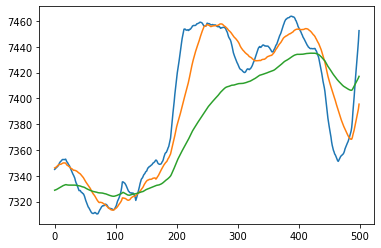

In [13]:
fig = plt.figure()
plt.plot(dataframe_low.SMA_Low[0:500])
plt.plot(dataframe_low.SMA_High[0:500])
plt.plot(dataframe_low.EMA[0:500])
plt.show()

In [14]:
startTimeStamp = dataframe_high.head(1).timestamp.item()
endTimeStamp = dataframe_high.tail(1).timestamp.item()

dataframe_low = dataframe_low[(dataframe_low.timestamp>=startTimeStamp) 
                              & (endTimeStamp>=dataframe_low.timestamp)]
dataframe_low = dataframe_low.reset_index(drop=True)

In [15]:
dataframe_low

,timestamp,open,high,low,close,volume,close_time,asset_volume,trades,buy_base_asset_volume,buy_quote_asset_volume,ignore,SMA_Low,SMA_High,EMA,ATR,EMA_Dev
0,2020-01-08 05:00:00,8343.92,8370.00,8341.79,8367.46,220.284566,1578459899999,1.841392e+06,2238,126.991433,1.061749e+06,0,8313.917727,8341.161273,8129.536842,30.842835,13.522394
1,2020-01-08 05:05:00,8367.57,8377.00,8349.62,8349.63,593.807745,1578460199999,4.968744e+06,2688,308.288824,2.580069e+06,0,8317.047727,8341.586909,8131.839510,30.685433,13.566030
2,2020-01-08 05:10:00,8349.63,8352.45,8335.53,8344.83,201.964015,1578460499999,1.685708e+06,2206,127.412008,1.063529e+06,0,8320.887727,8342.615636,8133.966580,30.059732,13.593118
3,2020-01-08 05:15:00,8345.34,8363.38,8344.46,8355.42,272.685710,1578460799999,2.278570e+06,2163,163.171964,1.363524e+06,0,8325.165909,8343.041636,8136.137559,29.553380,13.595873
4,2020-01-08 05:20:00,8355.43,8361.27,8354.01,8361.27,97.797364,1578461099999,8.173345e+05,1429,72.184158,6.032941e+05,0,8328.455000,8342.396182,8138.345096,28.540045,13.583188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103829,2021-01-03 14:10:00,34048.69,34070.48,33980.44,34048.36,305.252712,1609683299999,1.038270e+07,6019,167.692614,5.703620e+06,0,34102.911818,34098.677818,33402.846261,196.529570,51.164788
103830,2021-01-03 14:15:00,34048.35,34111.89,34000.00,34018.13,341.227211,1609683599999,1.162270e+07,6014,191.396651,6.519914e+06,0,34090.470000,34097.811091,33409.231796,192.682316,50.000311
103831,2021-01-03 14:20:00,34018.13,34150.00,34018.13,34042.79,338.600072,1609683899999,1.154724e+07,7105,158.557774,5.407237e+06,0,34088.070455,34096.199636,33415.679863,189.918120,48.889040
103832,2021-01-03 14:25:00,34042.79,34064.17,33926.96,33926.99,403.285429,1609684199999,1.371424e+07,8839,197.512191,6.716304e+06,0,34077.571818,34093.098364,33421.396755,187.522297,47.704594


In [38]:
class Backtest:
    def __init__(self,
                starting_capital,
                algo_stop_balance,
                leverage,
                transaction_fee,
                symbol,
                strategy_class,
                dataframe
                ):
        
        self.starting_capital = starting_capital 
        self.algo_stop_balance = algo_stop_balance 
        
        self.leverage = leverage 
        self.transaction_fee = transaction_fee 
        
        self.symbol = symbol
        self.current_balance = starting_capital
        
        self.balance_alloc = 0
    
        self.order_transaction_fee = 0
        
        self.squareoff_transaction_fee = 0
        
        self.quantity = 0
        self.balance_list = []
        
        
        self.current_price =0
        
        self.trade_count = 0
        self.order_status = OrderStatus.NO_ORDER
        
        self.buy_price = 0
        self.sell_price = 0
        self.pnl = 0
        
        self.square_off_index = 0
    
        self.total_pnl=0
        self.total_returns=0

        self.strategy_class = strategy_class
        self.dataframe = dataframe
        
        self.order_details_cols = [
        'count',
        'order_type',
        'balance_prior',
        'balance_post',
        'total_pnl',
        'total_returns',
        'price_symbol',
        'quantity_symbol',
        'squareOff_price_symbol',
        'order_pnl'
        ]
        self.order_details = pd.DataFrame(data=[],columns=self.order_details_cols)
        
    def setCurrent(self,row):
        ## Price of 1st Asset
        self.current_price = row.close
    
    def OrderInit(self,row,order_status):
        ## Increment Trade Count 
        
        self.trade_count = self.trade_count + 1
        self.order_status = order_status
        
        if(self.order_status == OrderStatus.LONG):
            self.buy_price = self.current_price
        if(self.order_status == OrderStatus.SHORT):
            self.sell_price = self.current_price
        
        print(' Trade Init '+ str(self.current_price))
        ## Strategy Stop Loss Calculation
        #self.strategy_class.set_squareOffCondition(row,self.order_status)
        
    def orderTransactionFee(self,capital):
        self.order_transaction_fee = capital * self.transaction_fee
        return self.order_transaction_fee
        
    def squareOffTransactionFee(self,capital):
        self.squareoff_transaction_fee = capital * self.transaction_fee
        return self.squareoff_transaction_fee
    
    def getQuantity(self,capital,price):
        transactionFee = self.orderTransactionFee(capital)
        self.quantity = ((capital - transactionFee)/price)
        return self.quantity
    
    def getPNL(self,buyPrice,sellPrice,capital):
        transactionFee = self.squareOffTransactionFee(capital)
        self.quantity = self.getQuantity(capital,buyPrice)

        totalSP = sellPrice * self.quantity
        
        self.pnl = (totalSP - capital) - transactionFee
        return self.pnl
        
    def orderSquareOffCalculations(self):
        if(self.order_status == OrderStatus.LONG):
            self.sell_price = self.current_price
        if(self.order_status == OrderStatus.SHORT):
            self.buy_price = self.current_price
        
        self.balance_alloc = self.leverage * self.current_balance
        
        self.pnl = self.getPNL(self.buy_price,self.sell_price,self.balance_alloc)
        return       
    
    def squareOff(self,index):
        self.orderSquareOffCalculations()

        self.total_pnl = self.total_pnl + self.pnl
        resultant_balance = self.current_balance +  self.pnl
        
        
        self.order_details = self.order_details.append(
            pd.DataFrame(
                data=[[
                    self.trade_count,                                   
                    self.order_status,                                  
                    self.current_balance,                                   
                    resultant_balance,                                  
                    self.total_pnl,                                 
                    0,                                  
                    self.buy_price,
                    self.quantity,
                    self.sell_price,
                    self.pnl                                       
                    ]],
                columns=self.order_details_cols))
        self.current_balance = resultant_balance
        self.balance_list.append(self.current_balance)
        self.strategy_class.order_status = OrderStatus.NO_ORDER
        self.order_status = OrderStatus.NO_ORDER 
        
    def runBacktest(self):
        
        for index,row in self.dataframe.iterrows():            
            self.setCurrent(row)
            if self.current_balance > self.algo_stop_balance:
                if(self.strategy_class.longOrderCondition(row)):
                    self.OrderInit(row,OrderStatus.LONG)
                if(self.strategy_class.shortOrderCondition(row)):
                    self.OrderInit(row,OrderStatus.LONG)
                if(self.strategy_class.squareOffCondition(row)):
                    self.squareOff(index)
        
        return self.current_balance,self.balance_list,self.order_details

In [17]:
dataframe_high[(dataframe_high.timestamp < dataframe_low.loc[50000].timestamp)].iloc[-1]

timestamp                 2020-06-30 10:30:00
open                                  9146.93
high                                     9159
low                                   9144.14
close                                 9151.88
volume                                529.195
close_time                      1593514799999
asset_volume                      4.84332e+06
trades                                   6150
buy_base_asset_volume                 223.363
buy_quote_asset_volume            2.04428e+06
ignore                                      0
SMA_Low                               9156.63
SMA_High                              9138.91
EMA                                    9159.7
ATR                                   28.4781
EMA_Dev                              0.702094
Name: 8334, dtype: object

In [40]:
class SMAStrategy:
    def __init__(self,dataframe_high,dataframe_low):
        self.dataframe_high = dataframe_high
        self.dataframe_low = dataframe_low
        
        self.ema_dev_threshold = 5
        
        self.stop_loss = 0
        self.high_tf_row = dataframe_high.loc[0]
        
        self.order_status = OrderStatus.NO_ORDER
        self.crossunder = 0
        self.crossover = 0
    
    def crossOver(self,ticker_row):
        if(ticker_row.SMA_Low >= ticker_row.SMA_High):
            self.crossover = 1
            self.crossunder = 0
            return True
        else:
            return False
    def crossUnder(self,ticker_row):
        if(ticker_row.SMA_Low <= ticker_row.SMA_High):
            self.crossunder = 1
            self.crossover = 0
            return True
        else:
            return False
        
    def set_squareOffCondition(self,ticker_row):
        
        #stop_loss_delta = (ticker_row.close * 0.02) + ticker_row.ATR
        stop_loss_delta = 4 * ticker_row.ATR
        if(self.order_status == OrderStatus.LONG):
            self.stop_loss = ticker_row.close - stop_loss_delta
        elif(self.order_status == OrderStatus.SHORT):
            self.stop_loss = ticker_row.close + stop_loss_delta
        
            
    def longOrderCondition(self,ticker_row):
        condition = False
        current_price = ticker_row.close
        if(self.order_status != OrderStatus.NO_ORDER):
            condition = False
        elif(self.crossOver(ticker_row)):
            self.high_tf_row = self.dataframe_high[
                (self.dataframe_high.timestamp < ticker_row.timestamp)
            ].iloc[-1]
            
            if((current_price > self.high_tf_row.EMA) 
              and 
               (ticker_row.EMA_Dev >self.ema_dev_threshold)
              ):
                self.order_status = OrderStatus.LONG
                self.set_squareOffCondition(ticker_row)
                condition = True
        
        return condition
    
    def shortOrderCondition(self,ticker_row):
        return False
    
    def longSquareOffCondition(self,ticker_row):
        current_price = ticker_row.close
        condition = False
        if(current_price <= self.stop_loss):
            self.crossover = 0
            self.crossunder = 0
            condition = True
        elif(self.crossunder == 0):
            if(self.crossUnder(ticker_row)):
                self.set_squareOffCondition(ticker_row)
        elif(self.crossover == 0):
            if(self.crossOver(ticker_row)):
                self.set_squareOffCondition(ticker_row)
        
        return condition
            
    def shortSquareOffCondition(self,ticker_row):
        current_price = ticker_row.close
        if(current_price >= self.stop_loss):
            return True
#         else:
#             return self.crossOver(ticker_row)
        
    def squareOffCondition(self,ticker_row):
        
        if(self.order_status == OrderStatus.LONG):
            return self.longSquareOffCondition(ticker_row)
        elif(self.order_status == OrderStatus.SHORT):
            return self.shortSquareOffCondition(ticker_row)
        else:
            return False
        


 Trade Init 8346.36
 Trade Init 8266.44
 Trade Init 8045.98
 Trade Init 7905.29
 Trade Init 8172.57
 Trade Init 8345.93
 Trade Init 8785.72
 Trade Init 8782.34
 Trade Init 9166.34
 Trade Init 8729.98
 Trade Init 8561.48
 Trade Init 8750.99
 Trade Init 9082.48
 Trade Init 9152.7
 Trade Init 9506.39
 Trade Init 9423.23
 Trade Init 9394.28
 Trade Init 9653.07
 Trade Init 10006.89
 Trade Init 10184.19
 Trade Init 9885.47


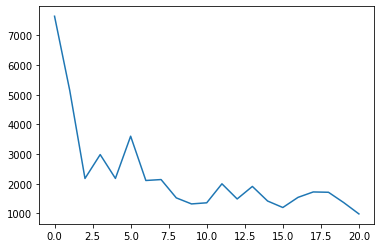

,count,order_type,balance_prior,balance_post,total_pnl,total_returns,price_symbol,quantity_symbol,squareOff_price_symbol,order_pnl
0,1,OrderStatus.LONG,10000,7649.147592,-2350.852408,0,8346.36,23.944570,8260.71,-2350.852408
0,2,OrderStatus.LONG,7649.15,5143.970142,-4856.029858,0,8266.44,18.492630,8143.38,-2505.177450
0,3,OrderStatus.LONG,5143.97,2179.000567,-7820.999433,0,8045.98,12.776845,7826.00,-2964.969576
0,4,OrderStatus.LONG,2179,2984.434953,-7015.565047,0,7905.29,5.508631,8063.37,805.434387
0,5,OrderStatus.LONG,2984.43,2180.494496,-7819.505504,0,8172.57,7.298063,8074.68,-803.940457
0,6,OrderStatus.LONG,2180.49,3604.266393,-6395.733607,0,8345.93,5.221369,8631.14,1423.771897
0,7,OrderStatus.LONG,3604.27,2110.644295,-7889.355705,0,8785.72,8.198675,8616.73,-1493.622098
0,8,OrderStatus.LONG,2110.64,2142.183423,-7857.816577,0,8782.34,4.802960,8802.09,31.539128
0,9,OrderStatus.LONG,2142.18,1524.415094,-8475.584906,0,9166.34,4.670516,9047.83,-617.768329
0,10,OrderStatus.LONG,1524.42,1320.527234,-8679.472766,0,8729.98,3.489749,8684.66,-203.887860


In [43]:
sma_strategy = SMAStrategy(dataframe_high,dataframe_low)

back = Backtest(
    10000,
    1000,
    20,
    0.075/100,
    'BTCUSDT',
    sma_strategy,
    dataframe_low)
current_balance,balance_list,order_details = back.runBacktest()
# cap_returns = round((current_balance -starting_capital) *100/current_balance)

fig = plt.figure()
# plt.plot(dataframe_low.loc[0:10000].close)
plt.plot(balance_list)
plt.show()
order_details
# balance_list

In [25]:
order_details

,count,order_type,balance_prior,balance_post,total_pnl,total_returns,price_symbol,quantity_symbol,squareOff_price_symbol,order_pnl
0,1,OrderStatus.LONG,10000,9900.990477,-99.009523,0,8346.36,1.197228,8276.19,-99.009523
0,2,OrderStatus.LONG,9900.99,9757.538542,-242.461458,0,8341.80,1.186023,8233.37,-143.451935
0,3,OrderStatus.LONG,9757.54,9630.215776,-369.784224,0,8045.98,1.211813,7952.99,-127.322767
0,4,OrderStatus.LONG,9630.22,9564.600523,-435.399477,0,7928.59,1.213708,7886.43,-65.615253
0,5,OrderStatus.LONG,9564.6,9624.014183,-375.985817,0,7905.29,1.208991,7966.30,59.413660
0,6,OrderStatus.LONG,9624.01,9616.716144,-383.283856,0,8056.68,1.193643,8062.66,-7.298039
0,7,OrderStatus.LONG,9616.72,9608.786252,-391.213748,0,8077.97,1.189594,8083.43,-7.929892
0,8,OrderStatus.LONG,9608.79,9575.755663,-424.244337,0,8174.34,1.174600,8158.49,-33.030589
0,9,OrderStatus.LONG,9575.76,9543.864918,-456.135082,0,8172.57,1.170816,8157.60,-31.890746
0,10,OrderStatus.LONG,9543.86,9717.576715,-282.423285,0,8345.93,1.142678,8510.48,173.711797


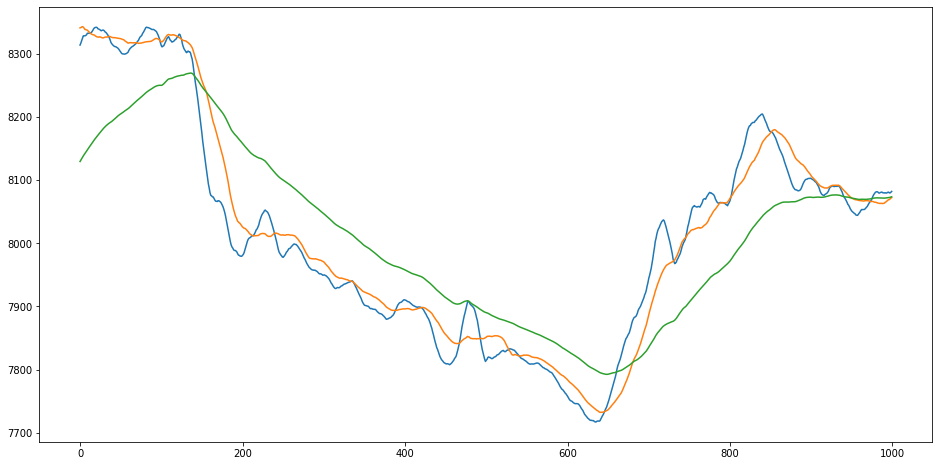

In [21]:
len_p = 1000
fig = plt.figure(figsize=(16,8))
plt.plot(dataframe_low.SMA_Low[0:len_p])
plt.plot(dataframe_low.SMA_High[0:len_p])
plt.plot(dataframe_low.EMA[0:len_p])
plt.show()

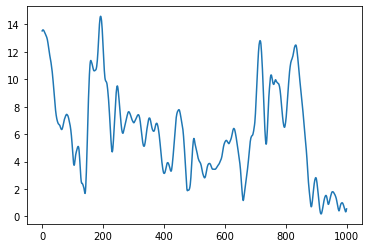

In [22]:
plt.plot(dataframe_low.EMA_Dev[0:len_p])